<a href="https://colab.research.google.com/github/mbroda2000/Python_projekt/blob/master/Corelation_matrix_and_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/Data_ML.csv')



In [39]:
import pandas as pd

new_data = data.copy()
new_data = new_data.drop('Unnamed: 0', axis=1)
new_data =new_data.drop('HaveWorkedWith', axis=1) # droping unnessesery datas

# Transformation of 'age'(1-age>35, 0-age<=35)
new_data['Age'] = (data['Age'] == '>35')

# Transformation of 'Accessibility' (1-Yes, 0-No)
new_data['Accessibility'] = (data['Accessibility'] == 'Yes')

# Transformation of 'EdLevel'
ed_level_mapping = {'Master': 1, 'Undergraduate': 2, 'PhD': 3, "NoHigherEd":0,  'Other': 4}
new_data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)

# Transformation of 'Employment' (1-employed, 0-not employed)
new_data['Employment'] = (data['Employment'] == 1)

# Transformation of 'Gender'
gender_mapping = {'Man': 1, 'Woman': 2, 'Nonbinary': 0}
new_data['Gender'] = data['Gender'].map(gender_mapping)

# Transformation of'MentalHealth' (1-Yes, 0-No)
new_data['MentalHealth'] = (data['MentalHealth'] == 'Yes')

# Transformation of 'MainBranch'(1-Dev, 0-NotDev)
new_data['MainBranch'] = (data['MainBranch'] == 'Dev')

#filtred_data = new_data.drop(['Age', 'Accessibility', 'Employment', 'MentalHealth', 'Employed'], axis=1)


# Transformation of 'Employed'(1-Employed, 0-Not Employed)
new_data['Employed'] = data['Employed']

print(new_data)



         Age  Accessibility  EdLevel  Employment  Gender  MentalHealth  \
0      False          False        1        True     1.0         False   
1      False          False        2        True     1.0         False   
2      False          False        1        True     1.0         False   
3      False          False        2        True     1.0         False   
4       True          False        3       False     1.0         False   
...      ...            ...      ...         ...     ...           ...   
73457  False          False        2        True     1.0         False   
73458   True          False        2        True     1.0         False   
73459  False          False        2        True     1.0         False   
73460  False           True        2        True     1.0          True   
73461  False          False        1        True     NaN         False   

       MainBranch  YearsCode  YearsCodePro  \
0            True          7             4   
1            True  

In [40]:
import numpy as np


new_data = new_data[new_data['Gender'] != 0]


countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Liechtenstein',
    'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore',
    'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Italy', 'Czech Republic', 'Slovakia',
    'Greece', 'Taiwan', 'Hong Kong', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Estonia'
]

new_data['Developed'] = new_data['Country'].isin(countries)



<ipython-input-41-ae0579ec33e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_data.corr()


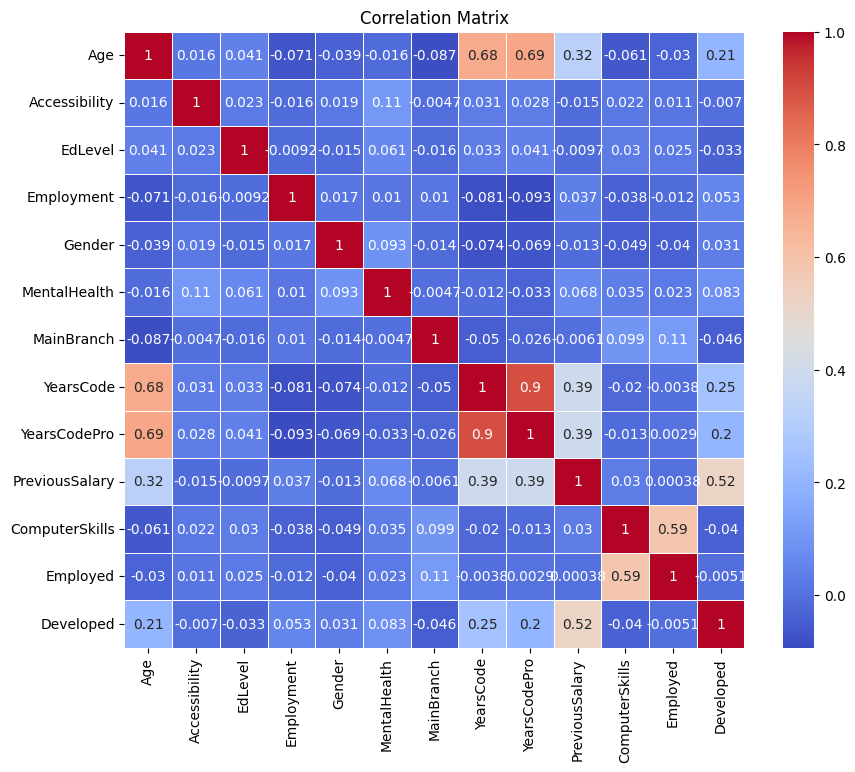

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = new_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### NA MACIEŻY MOŻEMY ZAUWAŻYĆ ŻE SALARY JEST SKOLEROWANE Z :
#- Developed(country)
#- Age
#- years code / years codepro

##yers code pro jest silnie skorelowane z Years code
#ponieważ jedno zawiera się w drugim

## dodatkowo można zobaczyć że computer skils jest skorelowane z employed (co w naszym projekcie nie jest istotne ale warto o tym wiedzieć)

array([[<Axes: title={'center': 'EdLevel'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'YearsCode'}>],
       [<Axes: title={'center': 'YearsCodePro'}>,
        <Axes: title={'center': 'PreviousSalary'}>,
        <Axes: title={'center': 'ComputerSkills'}>],
       [<Axes: title={'center': 'Employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

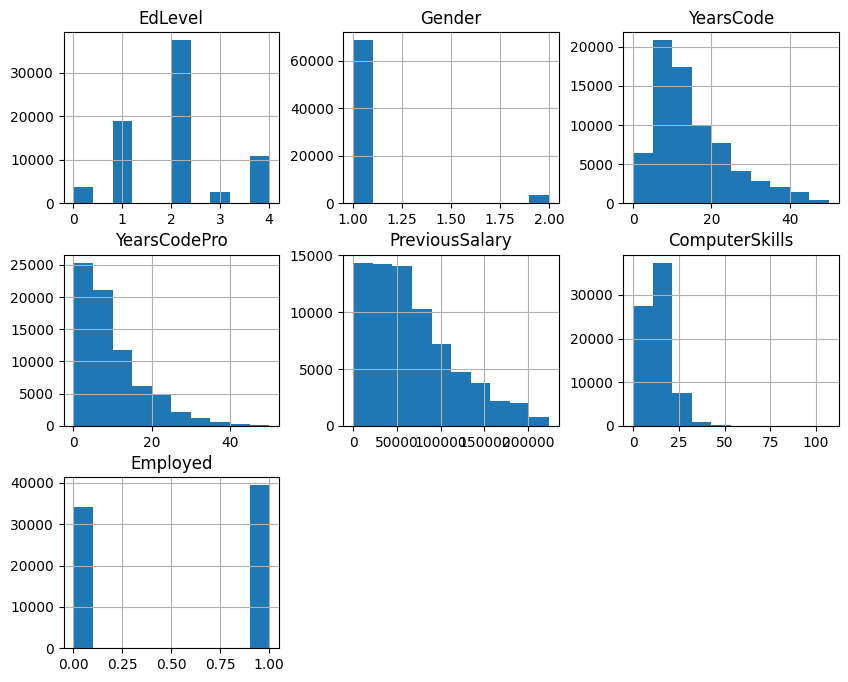

In [43]:
new_data.hist(figsize=(10, 8))

# tutaj musimy zaobserwować że previous salary jest podobne do:
#- years code pro i yeas code
# warto też zauważyć że komputer skils jest słabo skorelowane z zarobkami
#(ale nie musisz tych wykresów dodawać)